# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers

C:\Users\unive\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("compresive_strength_concrete.csv")

In [3]:
print(data.shape)

(1030, 9)


In [4]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
print(data.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [6]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

## Correlation:

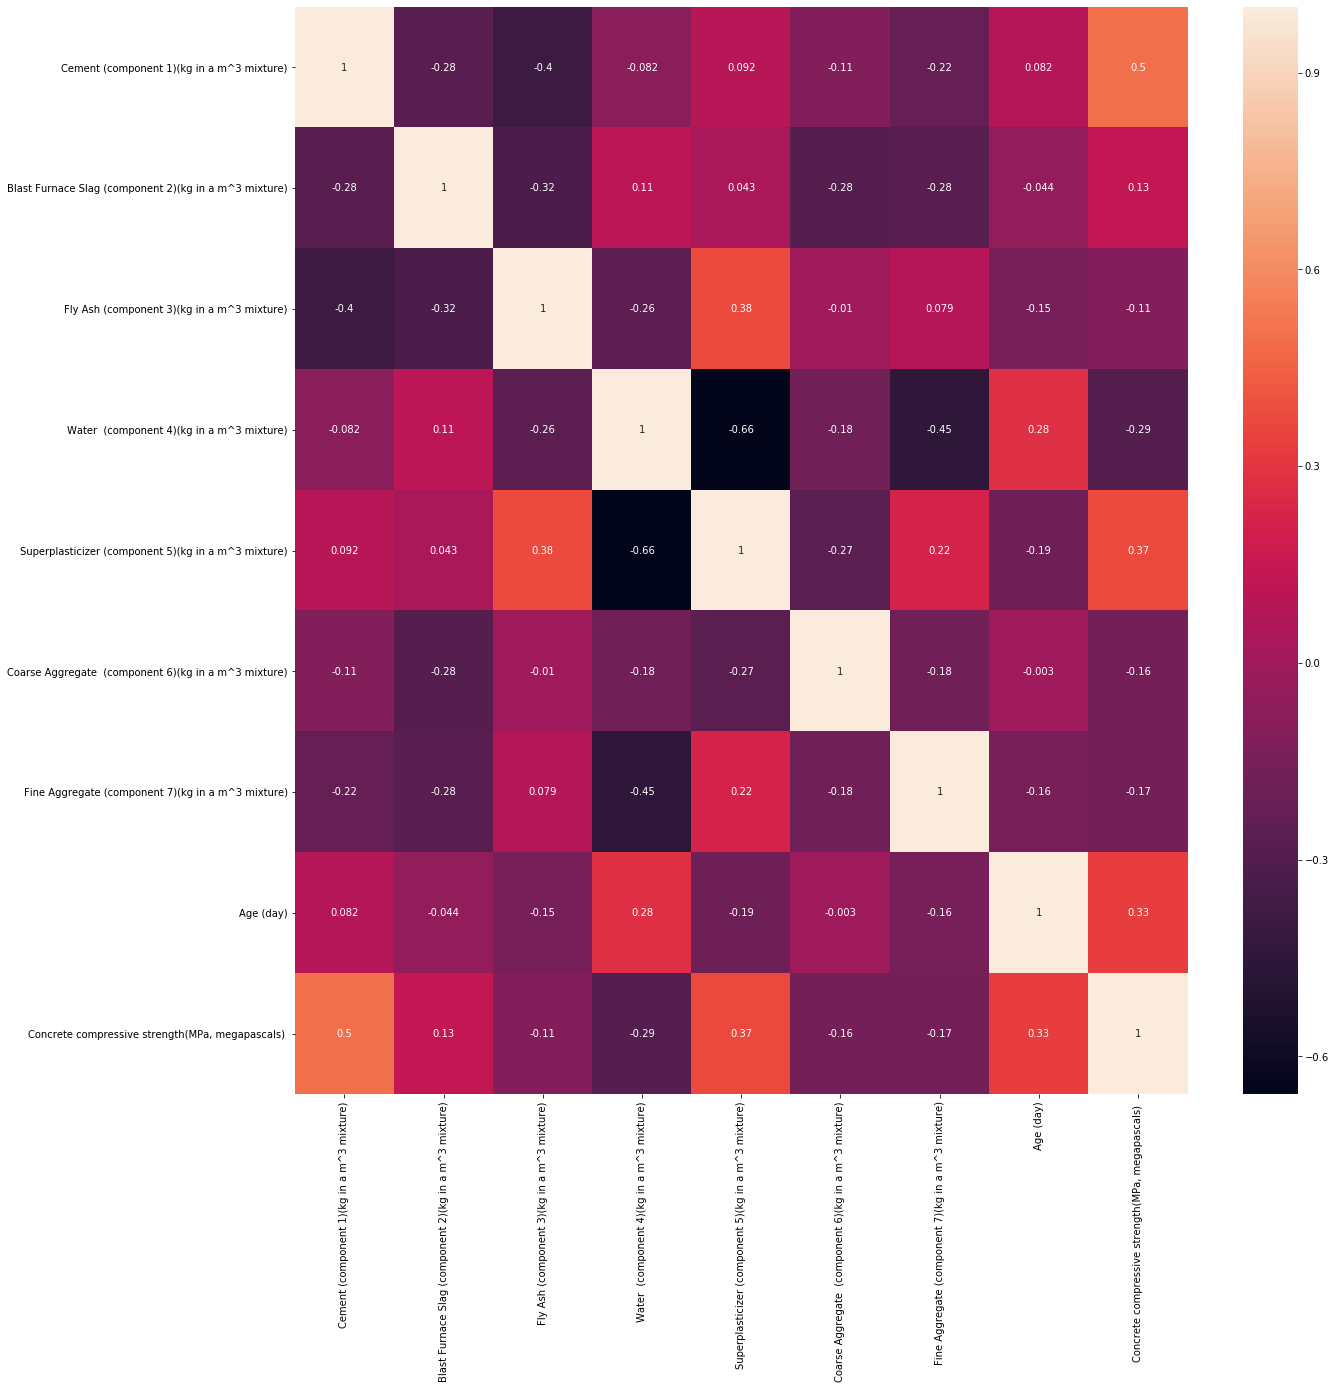

In [8]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True)

In [9]:
data_f = data.sample(frac=1)
data_f

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
345,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,14,33.73
462,172.4,13.6,172.4,156.8,4.1,1006.3,856.4,100,37.68
910,144.0,136.0,106.0,178.0,7.0,941.0,774.0,28,26.14
929,135.0,105.0,193.0,196.0,6.0,965.0,643.0,28,21.91
373,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,100,46.23
...,...,...,...,...,...,...,...,...,...
612,277.0,0.0,0.0,191.0,0.0,968.0,856.0,28,25.97
797,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,180,51.04
590,238.1,0.0,0.0,185.7,0.0,1118.8,789.3,7,10.34
265,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,14,31.35


## Data Split:

In [10]:
x = (data_f.loc[:, data_f.columns != 'Concrete compressive strength(MPa, megapascals) '])
y = (data_f.loc[:, data_f.columns == 'Concrete compressive strength(MPa, megapascals) '])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.40, random_state=42)

## Modeling:

In [12]:
mean=x_train.mean(axis=0)
x_train -= mean
std=x_train.std(axis=0)
x_train /= std

print(mean)
print(std)

x_train

Cement (component 1)(kg in a m^3 mixture)                279.852233
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     73.063107
Fly Ash (component 3)(kg in a m^3 mixture)                56.382718
Water  (component 4)(kg in a m^3 mixture)                180.457282
Superplasticizer (component 5)(kg in a m^3 mixture)        6.552233
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     972.435340
Fine Aggregate (component 7)(kg in a m^3 mixture)        777.472427
Age (day)                                                 45.522330
dtype: float64
Cement (component 1)(kg in a m^3 mixture)                105.163121
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     84.477936
Fly Ash (component 3)(kg in a m^3 mixture)                64.771204
Water  (component 4)(kg in a m^3 mixture)                 22.183600
Superplasticizer (component 5)(kg in a m^3 mixture)        6.264296
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      78.639566
Fine Aggregate (component 7)(kg i

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
271,-0.456930,-0.864878,1.006887,-0.291084,0.023589,1.067715,0.012746,-0.278014
211,-0.474047,-0.864878,0.955938,0.678101,-0.311644,0.724377,-0.234086,-0.278014
197,-0.809716,-0.864878,0.681125,-0.669742,0.151297,0.431903,1.592963,0.166242
963,-1.234770,1.938221,-0.870491,-0.300099,0.853690,1.231755,-1.273507,-0.278014
509,1.370706,-0.604455,1.167452,-0.561554,0.374785,-1.912973,-0.340757,-0.278014
...,...,...,...,...,...,...,...,...
391,1.113962,-0.661275,1.568865,-0.606632,2.274440,-0.069117,-1.791977,-0.278014
315,-0.266750,-0.864878,0.671862,-1.548769,0.933507,0.426816,1.517301,-0.500143
187,-0.546315,-0.864878,0.622457,0.398615,-0.327608,-0.067845,1.151395,0.166242
96,1.380215,0.393439,-0.870491,-1.309854,1.923243,-0.463321,0.325316,-0.611207


In [13]:
mean=x_test.mean(axis=0)
x_test -= mean
std=x_test.std(axis=0)
x_test /= std

print(mean)
print(std)

x_test

Cement (component 1)(kg in a m^3 mixture)                284.554045
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     69.520065
Fly Ash (component 3)(kg in a m^3 mixture)                53.294498
Water  (component 4)(kg in a m^3 mixture)                181.126537
Superplasticizer (component 5)(kg in a m^3 mixture)        5.689320
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     979.768608
Fine Aggregate (component 7)(kg in a m^3 mixture)        771.578317
Age (day)                                                 42.226537
dtype: float64
Cement (component 1)(kg in a m^3 mixture)                103.763158
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     87.068823
Fly Ash (component 3)(kg in a m^3 mixture)                63.467839
Water  (component 4)(kg in a m^3 mixture)                 18.456682
Superplasticizer (component 5)(kg in a m^3 mixture)        5.310274
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      76.839731
Fine Aggregate (component 7)(kg i

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
987,-1.181094,1.384881,1.493757,-0.126054,2.468927,-1.843690,-0.403426,-0.251609
281,-0.319517,-0.798450,1.024227,0.399501,0.133831,0.632894,-0.185527,-0.251609
740,0.119946,-0.798450,-0.839709,0.264049,-1.071380,0.783857,-0.502350,-0.623014
973,-1.356493,0.766979,0.833580,-0.163981,0.340977,-0.498032,0.036384,-0.251609
330,-0.363848,-0.798450,1.131368,-2.049477,1.188391,1.392917,0.391975,-0.499212
...,...,...,...,...,...,...,...,...
982,0.271252,-0.798450,-0.839709,-0.163981,0.435134,0.259389,0.676715,-0.251609
321,-0.341682,-0.798450,0.716985,-1.247599,1.339042,0.104521,1.569703,-0.251609
86,0.752155,1.372247,-0.839709,-0.879169,1.113065,-0.456386,-0.210926,-0.693758
387,2.269071,-0.798450,-0.839709,-0.331941,-0.092146,-1.428540,0.446784,-0.251609


In [14]:
mean=x_val.mean(axis=0)
x_val -= mean
std=x_val.std(axis=0)
x_val /= std

print(mean)
print(std)

x_val

Cement (component 1)(kg in a m^3 mixture)                279.377670
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     82.541262
Fly Ash (component 3)(kg in a m^3 mixture)                50.043204
Water  (component 4)(kg in a m^3 mixture)                185.003398
Superplasticizer (component 5)(kg in a m^3 mixture)        6.108738
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     963.853398
Fine Aggregate (component 7)(kg in a m^3 mixture)        766.853883
Age (day)                                                 51.165049
dtype: float64
Cement (component 1)(kg in a m^3 mixture)                104.357924
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     89.312268
Fly Ash (component 3)(kg in a m^3 mixture)                62.899807
Water  (component 4)(kg in a m^3 mixture)                 22.977657
Superplasticizer (component 5)(kg in a m^3 mixture)        6.136713
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      76.261641
Fine Aggregate (component 7)(kg i

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
182,0.797470,1.191983,-0.795602,-0.874911,0.894821,-0.251154,-0.127876,0.551432
786,0.494666,-0.924187,-0.795602,0.304496,-0.995441,0.185501,0.672661,-0.320672
491,1.031281,-0.700254,0.698838,-1.218723,1.334796,-0.339009,0.904030,-0.611373
965,0.489875,0.974768,-0.795602,0.430705,0.324484,-2.004329,0.410057,-0.320672
130,0.424715,2.242231,-0.795602,-0.052373,0.682982,-0.277379,-1.237291,-0.320672
...,...,...,...,...,...,...,...,...
619,-0.243179,-0.924187,-0.795602,0.565619,-0.995441,0.054373,1.112262,1.783451
664,-0.279592,0.943417,-0.795602,0.804982,-0.995441,0.180256,-0.841650,-0.611373
872,-0.176102,0.195480,0.444466,0.696181,0.471142,-1.309353,-0.067720,-0.320672
927,-1.172673,1.471900,1.620940,0.652660,0.471142,-1.899427,-0.727122,-0.320672


In [15]:
model=Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1))

## Compilation:

In [16]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [17]:
history=model.fit(x_train,y_train,epochs=300,validation_data=(x_val, y_val))

Epoch 1/300
17/17 [==============================] - 1s 29ms/step - loss: 1607.9508 - mae: 36.3954 - val_loss: 1574.4293 - val_mae: 36.0873
Epoch 2/300
17/17 [==============================] - 0s 4ms/step - loss: 1598.3979 - mae: 35.7970 - val_loss: 1559.1107 - val_mae: 35.8771
Epoch 3/300
17/17 [==============================] - 0s 4ms/step - loss: 1555.8534 - mae: 35.6924 - val_loss: 1541.1487 - val_mae: 35.6359
Epoch 4/300
17/17 [==============================] - 0s 4ms/step - loss: 1483.7737 - mae: 34.9290 - val_loss: 1521.6788 - val_mae: 35.3701
Epoch 5/300
17/17 [==============================] - 0s 4ms/step - loss: 1432.9375 - mae: 34.1227 - val_loss: 1498.7155 - val_mae: 35.0543
Epoch 6/300
17/17 [==============================] - 0s 4ms/step - loss: 1480.5886 - mae: 34.8042 - val_loss: 1470.2607 - val_mae: 34.6650
Epoch 7/300
17/17 [==============================] - 0s 4ms/step - loss: 1506.7207 - mae: 34.7700 - val_loss: 1437.6227 - val_mae: 34.2085
Epoch 8/300
17/17 [=======

17/17 [==============================] - 0s 4ms/step - loss: 149.2104 - mae: 10.1344 - val_loss: 150.3480 - val_mae: 9.7445
Epoch 61/300
17/17 [==============================] - 0s 4ms/step - loss: 137.5593 - mae: 9.5886 - val_loss: 149.4385 - val_mae: 9.7072
Epoch 62/300
17/17 [==============================] - 0s 5ms/step - loss: 133.6379 - mae: 9.5569 - val_loss: 149.0543 - val_mae: 9.7133
Epoch 63/300
17/17 [==============================] - 0s 5ms/step - loss: 127.6869 - mae: 9.3645 - val_loss: 146.9571 - val_mae: 9.6487
Epoch 64/300
17/17 [==============================] - 0s 4ms/step - loss: 144.5764 - mae: 10.1076 - val_loss: 146.1765 - val_mae: 9.6203
Epoch 65/300
17/17 [==============================] - 0s 4ms/step - loss: 128.7562 - mae: 9.3576 - val_loss: 145.9718 - val_mae: 9.5961
Epoch 66/300
17/17 [==============================] - 0s 5ms/step - loss: 132.7782 - mae: 9.3990 - val_loss: 145.9523 - val_mae: 9.5684
Epoch 67/300
17/17 [==============================] - 0s 4m

17/17 [==============================] - 0s 4ms/step - loss: 118.7071 - mae: 8.9333 - val_loss: 125.6845 - val_mae: 8.8870
Epoch 121/300
17/17 [==============================] - 0s 4ms/step - loss: 120.5414 - mae: 8.9014 - val_loss: 125.2353 - val_mae: 8.8317
Epoch 122/300
17/17 [==============================] - 0s 4ms/step - loss: 110.1083 - mae: 8.5294 - val_loss: 124.8612 - val_mae: 8.7957
Epoch 123/300
17/17 [==============================] - 0s 3ms/step - loss: 101.6139 - mae: 8.1695 - val_loss: 124.2300 - val_mae: 8.7910
Epoch 124/300
17/17 [==============================] - 0s 4ms/step - loss: 114.0353 - mae: 8.7658 - val_loss: 124.8394 - val_mae: 8.7842
Epoch 125/300
17/17 [==============================] - 0s 4ms/step - loss: 103.8867 - mae: 8.3401 - val_loss: 125.0110 - val_mae: 8.8324
Epoch 126/300
17/17 [==============================] - 0s 4ms/step - loss: 104.2688 - mae: 8.3004 - val_loss: 125.9922 - val_mae: 8.9131
Epoch 127/300
17/17 [==============================] - 

17/17 [==============================] - 0s 4ms/step - loss: 80.5539 - mae: 7.1029 - val_loss: 101.0116 - val_mae: 7.9564
Epoch 181/300
17/17 [==============================] - 0s 7ms/step - loss: 87.9334 - mae: 7.5259 - val_loss: 99.6798 - val_mae: 7.8729
Epoch 182/300
17/17 [==============================] - 0s 4ms/step - loss: 86.6976 - mae: 7.5476 - val_loss: 99.5072 - val_mae: 7.8593
Epoch 183/300
17/17 [==============================] - 0s 4ms/step - loss: 94.8976 - mae: 7.7254 - val_loss: 98.4481 - val_mae: 7.8227
Epoch 184/300
17/17 [==============================] - 0s 4ms/step - loss: 88.0283 - mae: 7.5232 - val_loss: 97.3122 - val_mae: 7.7601
Epoch 185/300
17/17 [==============================] - 0s 4ms/step - loss: 85.3072 - mae: 7.3862 - val_loss: 96.5585 - val_mae: 7.7331
Epoch 186/300
17/17 [==============================] - 0s 5ms/step - loss: 84.3409 - mae: 7.3605 - val_loss: 98.2730 - val_mae: 7.8305
Epoch 187/300
17/17 [==============================] - 0s 6ms/step -

Epoch 241/300
17/17 [==============================] - 0s 4ms/step - loss: 69.9268 - mae: 6.6671 - val_loss: 74.5903 - val_mae: 6.7630
Epoch 242/300
17/17 [==============================] - 0s 4ms/step - loss: 72.9891 - mae: 6.7168 - val_loss: 73.9936 - val_mae: 6.6791
Epoch 243/300
17/17 [==============================] - 0s 4ms/step - loss: 72.0152 - mae: 6.8366 - val_loss: 74.6514 - val_mae: 6.7679
Epoch 244/300
17/17 [==============================] - 0s 4ms/step - loss: 73.3270 - mae: 6.8191 - val_loss: 74.3941 - val_mae: 6.7267
Epoch 245/300
17/17 [==============================] - 0s 4ms/step - loss: 63.6845 - mae: 6.3253 - val_loss: 74.4444 - val_mae: 6.7708
Epoch 246/300
17/17 [==============================] - 0s 4ms/step - loss: 61.8801 - mae: 6.1958 - val_loss: 73.7750 - val_mae: 6.6947
Epoch 247/300
17/17 [==============================] - 0s 4ms/step - loss: 67.6487 - mae: 6.5573 - val_loss: 75.5814 - val_mae: 6.8511
Epoch 248/300
17/17 [==============================] - 

In [18]:
train_mae=history.history['mae']
val_mae=history.history['val_mae']

Text(0, 0.5, 'MAE')

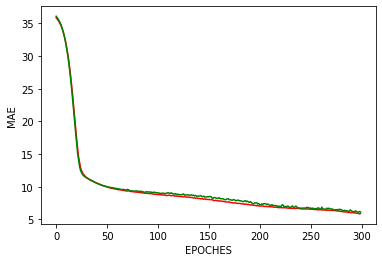

In [19]:
epochs=range(0,300)
plt.plot(epochs,train_mae,'r')
plt.plot(epochs,val_mae,'g')
plt.xlabel('EPOCHES')
plt.ylabel('MAE')

## Model Retuning:

In [20]:
model.add(layers.Dense(32, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(x_train.shape[1],)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(4, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
model.add(layers.Dense(1))

In [21]:
model.compile(optimizer='rmsprop', loss='mse', metrics='mae')
history = model.fit(x_train,y_train, batch_size=16, epochs=200, validation_data=(x_val, y_val))

Epoch 1/200
33/33 [==============================] - 1s 8ms/step - loss: 1712.7063 - mae: 37.8335 - val_loss: 1592.1981 - val_mae: 36.3295
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 1591.4218 - mae: 36.0475 - val_loss: 1589.6793 - val_mae: 36.2962
Epoch 3/200
33/33 [==============================] - 0s 2ms/step - loss: 1449.8792 - mae: 34.1898 - val_loss: 1587.2489 - val_mae: 36.2638
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 1600.9352 - mae: 36.3028 - val_loss: 1584.8348 - val_mae: 36.2314
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 1548.8124 - mae: 35.7334 - val_loss: 1582.3917 - val_mae: 36.1985
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 1561.3992 - mae: 35.8587 - val_loss: 1579.9618 - val_mae: 36.1658
Epoch 7/200
33/33 [==============================] - 0s 5ms/step - loss: 1545.1924 - mae: 35.5014 - val_loss: 1550.3092 - val_mae: 35.8036
Epoch 8/200
33/33 [========

Epoch 62/200
33/33 [==============================] - 0s 3ms/step - loss: 44.8641 - mae: 5.1759 - val_loss: 58.0116 - val_mae: 5.7294
Epoch 63/200
33/33 [==============================] - 0s 3ms/step - loss: 43.9512 - mae: 5.0105 - val_loss: 54.8487 - val_mae: 5.6140
Epoch 64/200
33/33 [==============================] - 0s 5ms/step - loss: 40.7191 - mae: 5.0344 - val_loss: 76.4849 - val_mae: 6.7153
Epoch 65/200
33/33 [==============================] - 0s 3ms/step - loss: 44.4005 - mae: 5.2078 - val_loss: 66.4517 - val_mae: 6.0962
Epoch 66/200
33/33 [==============================] - 0s 3ms/step - loss: 44.0343 - mae: 5.1778 - val_loss: 54.6135 - val_mae: 5.5884
Epoch 67/200
33/33 [==============================] - 0s 3ms/step - loss: 39.8723 - mae: 4.8757 - val_loss: 54.5003 - val_mae: 5.5589
Epoch 68/200
33/33 [==============================] - 0s 5ms/step - loss: 42.3444 - mae: 4.9782 - val_loss: 55.3593 - val_mae: 5.6235
Epoch 69/200
33/33 [==============================] - 0s 4ms/s

Epoch 123/200
33/33 [==============================] - 0s 3ms/step - loss: 37.9258 - mae: 4.7154 - val_loss: 51.2789 - val_mae: 5.4816
Epoch 124/200
33/33 [==============================] - 0s 3ms/step - loss: 40.9691 - mae: 4.7911 - val_loss: 56.9329 - val_mae: 5.7064
Epoch 125/200
33/33 [==============================] - 0s 3ms/step - loss: 42.6902 - mae: 4.9747 - val_loss: 49.9781 - val_mae: 5.4043
Epoch 126/200
33/33 [==============================] - 0s 2ms/step - loss: 42.4111 - mae: 4.8588 - val_loss: 48.9820 - val_mae: 5.3129
Epoch 127/200
33/33 [==============================] - 0s 4ms/step - loss: 33.7900 - mae: 4.4711 - val_loss: 51.3996 - val_mae: 5.4887
Epoch 128/200
33/33 [==============================] - 0s 6ms/step - loss: 36.7821 - mae: 4.5705 - val_loss: 48.8904 - val_mae: 5.3252
Epoch 129/200
33/33 [==============================] - 0s 3ms/step - loss: 37.4053 - mae: 4.6631 - val_loss: 49.9830 - val_mae: 5.4366
Epoch 130/200
33/33 [==============================] - 

33/33 [==============================] - 0s 3ms/step - loss: 38.3425 - mae: 4.7860 - val_loss: 47.1372 - val_mae: 5.2252
Epoch 184/200
33/33 [==============================] - 0s 5ms/step - loss: 37.1142 - mae: 4.5602 - val_loss: 47.2569 - val_mae: 5.2690
Epoch 185/200
33/33 [==============================] - 0s 3ms/step - loss: 33.6725 - mae: 4.4662 - val_loss: 52.5931 - val_mae: 5.4964
Epoch 186/200
33/33 [==============================] - 0s 3ms/step - loss: 36.5914 - mae: 4.6510 - val_loss: 47.3583 - val_mae: 5.2259
Epoch 187/200
33/33 [==============================] - 0s 2ms/step - loss: 34.1474 - mae: 4.4175 - val_loss: 47.7852 - val_mae: 5.3047
Epoch 188/200
33/33 [==============================] - 0s 2ms/step - loss: 33.2638 - mae: 4.4843 - val_loss: 50.3850 - val_mae: 5.4821
Epoch 189/200
33/33 [==============================] - 0s 3ms/step - loss: 35.3601 - mae: 4.5177 - val_loss: 48.6217 - val_mae: 5.3646
Epoch 190/200
33/33 [==============================] - 0s 4ms/step - 

In [22]:
train_mae=history.history['mae']
val_mae=history.history['val_mae']

Text(0, 0.5, 'MAE')

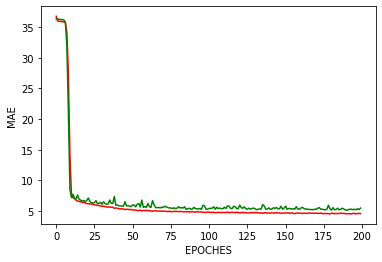

In [23]:
epochs=range(0,200)
plt.plot(epochs,train_mae,'r')
plt.plot(epochs,val_mae,'g')
plt.xlabel('EPOCHES')
plt.ylabel('MAE')

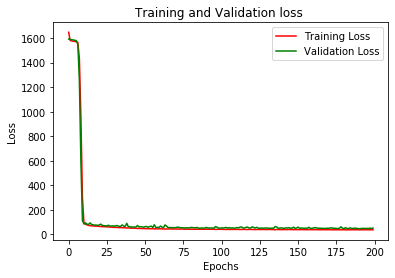

In [25]:
epochs=range(0,200)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction:

In [26]:
a=model.predict(x_test)
print(a[0])
np.array(y_test)[0]

[33.866226]


array([33.76])

In [27]:
results = model.evaluate(x_test, y_test)
results

10/10 [==============================] - 0s 2ms/step - loss: 52.7912 - mae: 5.1101


[52.79124069213867, 5.1100969314575195]